11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 - 8s - 4ms/step - accuracy: 0.9258 - loss: 0.2578
Epoch 2/5
1875/1875 - 10s - 5ms/step - accuracy: 0.9667 - loss: 0.1122
Epoch 3/5
1875/1875 - 8s - 4ms/step - accuracy: 0.9765 - loss: 0.0776
Epoch 4/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9816 - loss: 0.0582
Epoch 5/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9863 - loss: 0.0445
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

📊 MÉTRICAS:
Acurácia: 0.9758
Precisão (macro): 0.9758
Recall/Sensibilidade (macro): 0.9757
Especificidade (média): 0.9973
F1-score (macro): 0.9756


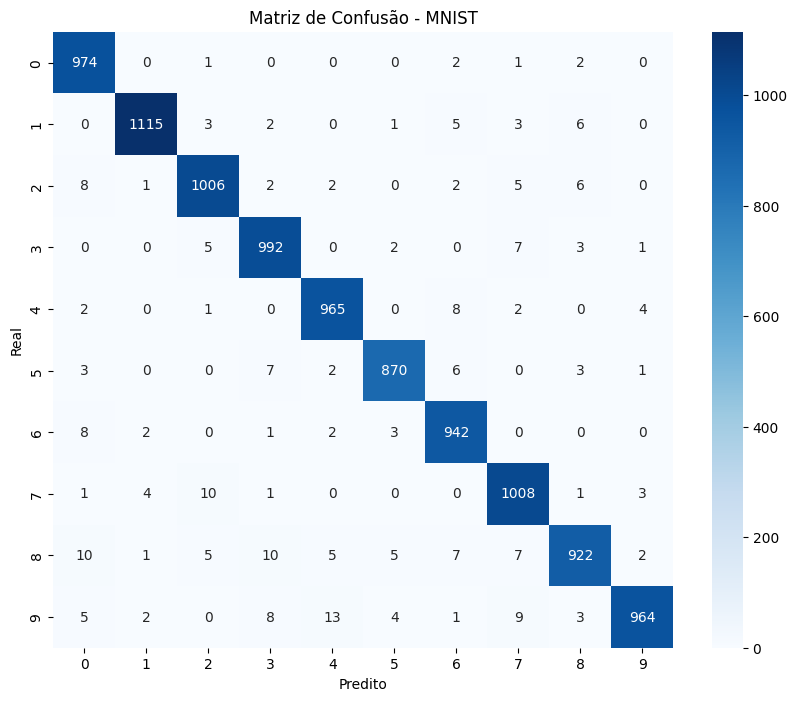

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Carregar dados
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# 2. Modelo simples em Keras
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# 3. Compilar e treinar
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=2)

# 4. Previsões
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# 5. Métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

# 6. Especificidade (manual)
def compute_specificity(cm):
    FP = cm.sum(axis=0) - np.diag(cm)
    TN = cm.sum() - (cm.sum(axis=1) + FP)
    specificity = TN / (TN + FP)
    return np.mean(specificity)

spec = compute_specificity(cm)

# 7. Exibir métricas
print("\n📊 MÉTRICAS:")
print(f"Acurácia: {acc:.4f}")
print(f"Precisão (macro): {prec:.4f}")
print(f"Recall/Sensibilidade (macro): {recall:.4f}")
print(f"Especificidade (média): {spec:.4f}")
print(f"F1-score (macro): {f1:.4f}")

# 8. Matriz de Confusão
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - MNIST")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()
